<a href="https://colab.research.google.com/github/safakan/CCTB_repo_safak_atakan_celik/blob/main/DEA113/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading Data**

In [15]:
import pandas as pd
# raw data url from github repo
url = "https://raw.githubusercontent.com/safakan/CCTB_repo_safak_atakan_celik/refs/heads/main/DEA113/exercise_data.csv"

# data = pd.read_csv("sample_data/custom_data/exercise_data.csv")
data = pd.read_csv(url)

data.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,01-12-2020,110,130,409.1
1,60,02-12-2020,117,145,479.0
2,60,03-12-2020,103,135,340.0
3,45,04-12-2020,109,175,282.4
4,45,05-12-2020,117,148,406.0


In [16]:
# To read last 5 rows
data.tail()

,Duration,Date,Pulse,Maxpulse,Calories
27,60,27-12-2020,92,118,241.0
28,60,28-12-2020,103,132,NaN
29,60,29-12-2020,100,132,280.0
30,60,30-12-2020,102,129,380.3
31,60,31-12-2020,92,115,243.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [18]:
data.describe()

,Duration,Pulse,Maxpulse,Calories
count,32.000000,32.000000,32.000000,30.000000
mean,68.437500,103.500000,128.500000,304.680000
std,70.039591,7.832933,12.998759,66.003779
min,30.000000,90.000000,101.000000,195.100000
25%,60.000000,100.000000,120.000000,250.700000
50%,60.000000,102.500000,127.500000,291.200000
75%,60.000000,106.500000,132.250000,343.975000
max,450.000000,130.000000,175.000000,479.000000


**Missing Values Analysis**

In [19]:
# get the null value count in each column
data.isnull().sum()

,0
Duration,0
Date,1
Pulse,0
Maxpulse,0
Calories,2


In [20]:
# to get the percentage of null values in each column
(data.isnull().sum()/len(data))*100

,0
Duration,0.000
Date,3.125
Pulse,0.000
Maxpulse,0.000
Calories,6.250


In [21]:
data.shape

(32, 5)

**Data Reduction**

In [22]:
# removing the pulse column
# data = data.drop(['Pulse'], axis=1)
data.drop(['Pulse'], axis=1, inplace=False).head()

,Duration,Date,Maxpulse,Calories
0,60,01-12-2020,130,409.1
1,60,02-12-2020,145,479.0
2,60,03-12-2020,135,340.0
3,45,04-12-2020,175,282.4
4,45,05-12-2020,148,406.0


In [23]:
data.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,01-12-2020,110,130,409.1
1,60,02-12-2020,117,145,479.0
2,60,03-12-2020,103,135,340.0
3,45,04-12-2020,109,175,282.4
4,45,05-12-2020,117,148,406.0


In [24]:
data.shape

(32, 5)

**Working with Date & Time**

In [25]:
from datetime import date
# print(date.today().year, date.today().month, date.today().day)
print(date.today().year)
print(date.today().month)
print(date.today())
# Is it jan 23? no.. date times in utc .. +2



2025
1
2025-01-28


In [26]:
from datetime import datetime
current_time = datetime.now()
print(current_time)

print("Current Time:", current_time.strftime("%H:%M:%S"))

2025-01-28 02:39:07.617788
Current Time: 02:39:07


**Feature Engineering**

In [27]:
# Calculate the difference between Pulse & MaxPulse and store it in a new column "DifferenceOfPulse"
data['DifferenceOfPulse'] = data['Maxpulse'] - data['Pulse']
data.head()

,Duration,Date,Pulse,Maxpulse,Calories,DifferenceOfPulse
0,60,01-12-2020,110,130,409.1,20
1,60,02-12-2020,117,145,479.0,28
2,60,03-12-2020,103,135,340.0,32
3,45,04-12-2020,109,175,282.4,66
4,45,05-12-2020,117,148,406.0,31


**[Handling missing values]** Different ways of handling missing values:

1. Mean
2. Mod
3. Median
4. Drop those rows

-- think about which one to use on which scenario --

In [28]:
data['Calories'] = data['Calories'].fillna(data['Calories'].mean())

print("Mean of Maxpulse is: ", data['Maxpulse'].mean())
print("Median of Maxpulse is: ", data['Maxpulse'].median())
print("Mode of Maxpulse is: ", data['Maxpulse'].mode()[0])


# Mean, Median, Mode of Calories:
# data['Calories'].mean()

Mean of Maxpulse is:  128.5
Median of Maxpulse is:  127.5
Mode of Maxpulse is:  120


In [29]:
data.head(20)

,Duration,Date,Pulse,Maxpulse,Calories,DifferenceOfPulse
0,60,01-12-2020,110,130,409.10,20
1,60,02-12-2020,117,145,479.00,28
2,60,03-12-2020,103,135,340.00,32
3,45,04-12-2020,109,175,282.40,66
4,45,05-12-2020,117,148,406.00,31
5,60,06-12-2020,102,127,300.00,25
6,60,07-12-2020,110,136,374.00,26
7,450,08-12-2020,104,134,253.30,30
8,30,09-12-2020,109,133,195.10,24
9,60,10-12-2020,98,124,269.00,26


In [30]:
data_cleaned = data.dropna()
# all the rows of all the columns those contain null values

# data_cleaned.shape
data_cleaned.isnull().sum()

,0
Duration,0
Date,0
Pulse,0
Maxpulse,0
Calories,0
DifferenceOfPulse,0


In [31]:
data_cleaned.shape

(31, 6)

In [32]:
data = data.dropna(subset=['Calories'])
#delete null rows from calories columns only
print(data.isnull().sum())
print(data.shape)

Duration             0
Date                 1
Pulse                0
Maxpulse             0
Calories             0
DifferenceOfPulse    0
dtype: int64
(32, 6)


---

27/01/2025

In [33]:
import pandas as pd
import numpy as np

# Creating Data Frame
tempData = pd.DataFrame({
    'Age': [25, 30, np.nan, 35, 40],
    'Salary': [50000, 60000, 55000, np.nan, 65000],
    'City': ['New York', 'San Francisco', np.nan, 'Chicago', 'New York']
})


# Question 1: Fill the missing values, to use, age: mean, salary: median, city: mode
tempData

,Age,Salary,City
0,25.0,50000.0,New York
1,30.0,60000.0,San Francisco
2,NaN,55000.0,NaN
3,35.0,NaN,Chicago
4,40.0,65000.0,New York


In [34]:
# Solution 1:
tempData['Age'] = tempData['Age'].fillna(tempData['Age'].mean())
tempData['Salary'] = tempData['Salary'].fillna(tempData['Salary'].median())
tempData['City'] = tempData['City'].fillna(tempData['City'].mode()[0])
tempData

,Age,Salary,City
0,25.0,50000.0,New York
1,30.0,60000.0,San Francisco
2,32.5,55000.0,New York
3,35.0,57500.0,Chicago
4,40.0,65000.0,New York


**Visualization**

In [35]:
import matplotlib.pyplot as plt

<Axes: >

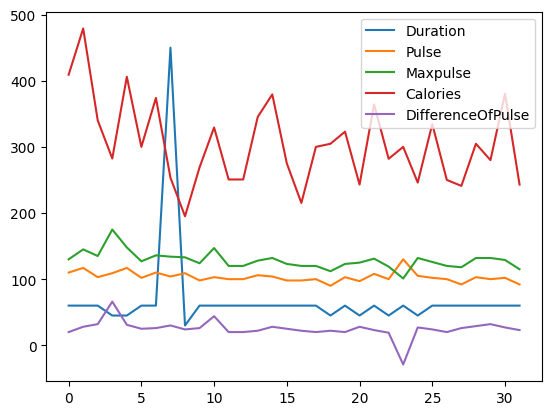

In [38]:
data.plot()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

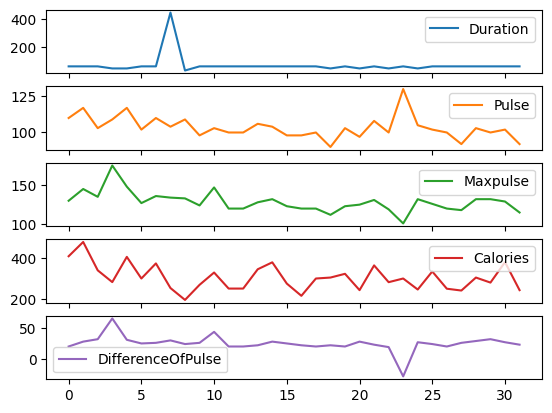

In [39]:
data.plot(kind='line', subplots=True)

<Axes: >

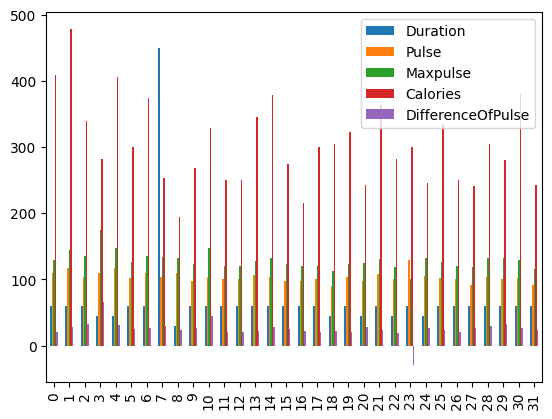

In [42]:
data.plot(kind='bar')

<Axes: >

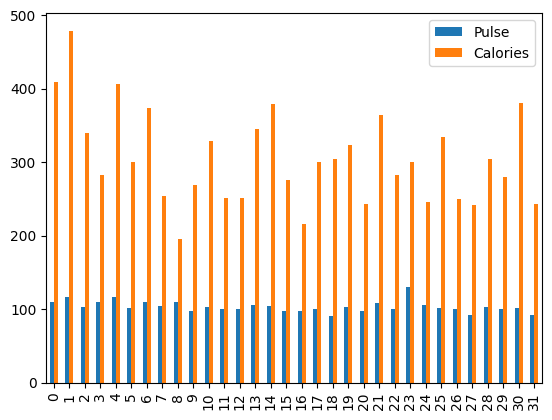

In [40]:
barData = data[["Pulse", "Calories"]]
barData.plot(kind='bar')